In [1]:
from dataset_utils import show_lozenge, show_center
import torch
import numpy as np
import model.model as arch
import matplotlib.pyplot as plt


In [2]:
## Need path to state dictionary
state_path = 'supervised_weights/model_best.pth'

In [3]:
# bigger plots
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.axisbelow'] = False

In [4]:

net = arch.LocalizationModel()
net.load_state_dict(torch.load(state_path)['state_dict'])
net = net.eval()

In [5]:
images_test = np.load('data_loader/data/red_lozenges/images_test.npy')
centers_test = np.load('data_loader/data/red_lozenges/centers_test.npy')
scales_test = np.load('data_loader/data/red_lozenges/scales_test.npy')
rots_test = np.load('data_loader/data/red_lozenges/rots_test.npy')
labels_test = np.column_stack([centers_test, scales_test, rots_test])

In [6]:
offset = 0
labels_test_pred = net(torch.tensor(np.transpose(images_test[:100],(0,3,1,2))).float()).detach()
errors = ((labels_test[:100] - (labels_test_pred.numpy() + offset))**2)

In [7]:
errors.mean(axis=0)

array([19.78760426,  8.32493518,  5.44367323,  0.64362639])

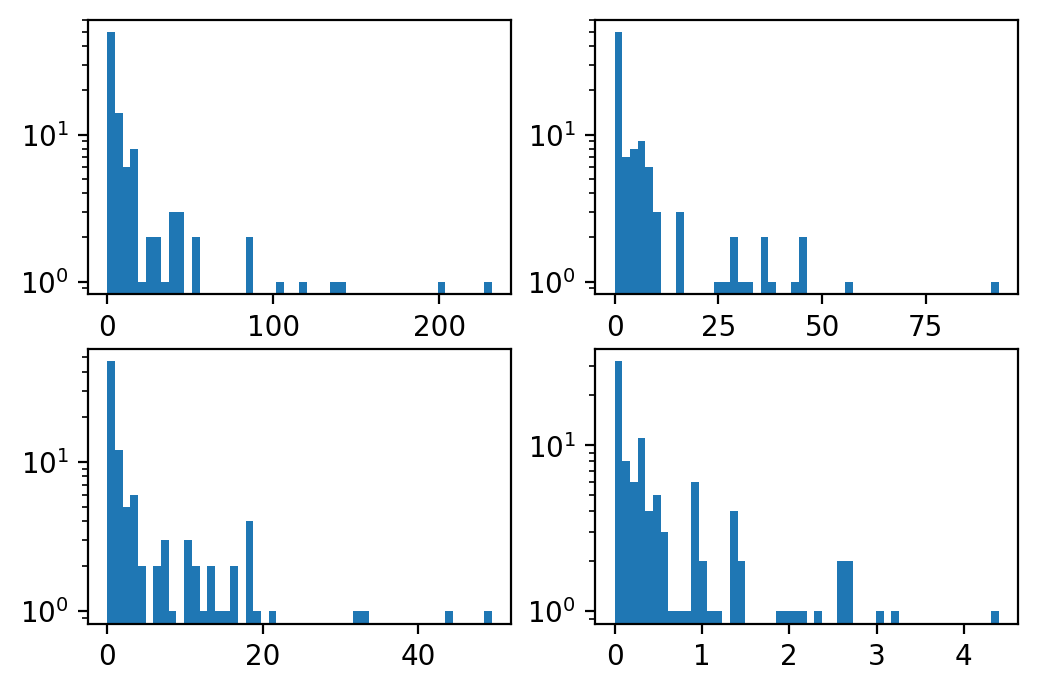

In [8]:
plt.figure()
plt.subplot(2, 2, 1)
plt.hist(errors[:, 0], 50)
plt.yscale('log')
plt.subplot(2, 2, 2)
plt.hist(errors[:, 1], 50)
plt.yscale('log')
plt.subplot(2, 2, 3)
plt.hist(errors[:, 2], 50)
plt.yscale('log')
plt.subplot(2, 2, 4)
plt.hist(errors[:, 3], 50)
plt.yscale('log');

In [9]:
offset_pred =labels_test[0] - net(torch.tensor(np.transpose(images_test[0],(2,0,1))).unsqueeze_(0).float()).detach().numpy()
#if supervised

offset_pred = 0

In [10]:
labels_pred = net(torch.tensor(np.transpose(images_test[:16],(0,3,1,2))).float()).detach().numpy() + offset_pred

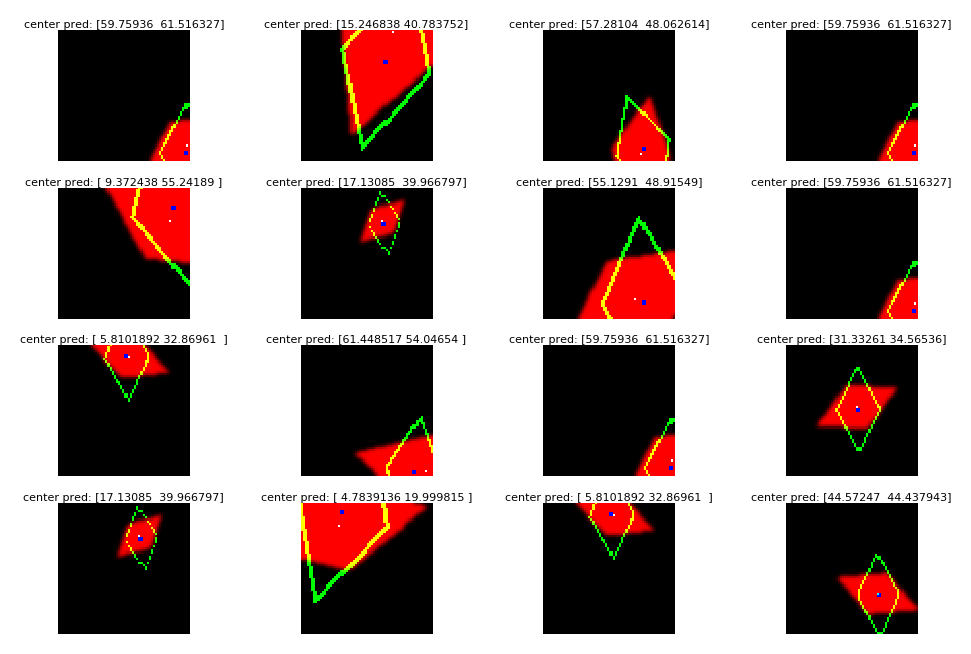

In [11]:
#show_center(images_test[0:16], labels_test[:16,:2], labels_pred[:16,:2])
show_lozenge(images_test[:16],labels_test[:16], targets_pred = labels_pred)

# Trying deltas pipeline

In [12]:
## Need path to state dictionary
state_path = 'delta_test/model_best.pth'
dnet = arch.LocalizationModel()
dnet.load_state_dict(torch.load(state_path)['state_dict'])
dnet = dnet.eval()

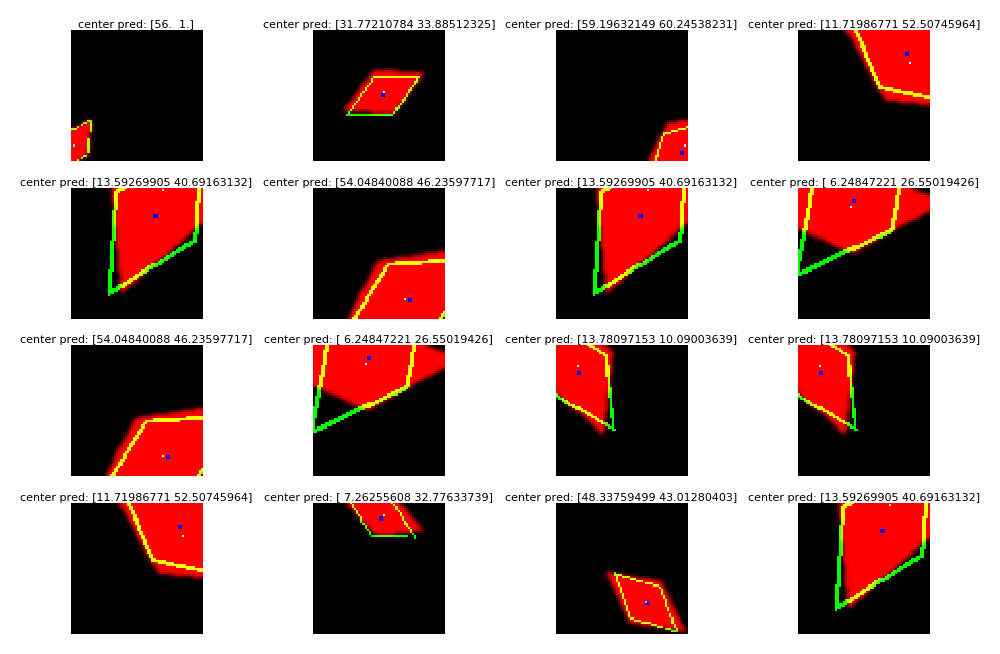

In [13]:
offset_pred =labels_test[0] - dnet(torch.tensor(np.transpose(images_test[0],(2,0,1))).unsqueeze_(0).float()).detach().numpy()
#offset_pred=0
labels_pred = dnet(torch.tensor(np.transpose(images_test[:16],(0,3,1,2))).float()).detach().numpy() + offset_pred
show_lozenge(images_test[:16],labels_test[:16], targets_pred = labels_pred)

In [14]:
labels_test_pred = dnet(torch.tensor(np.transpose(images_test[1:100],(0,3,1,2))).float()).detach()

errors = ((labels_test[1:100] - (labels_test_pred.numpy() + offset_pred))**2)
errors.mean(axis=0)

array([13.70975995,  7.90295881,  3.91010522,  0.20185014])

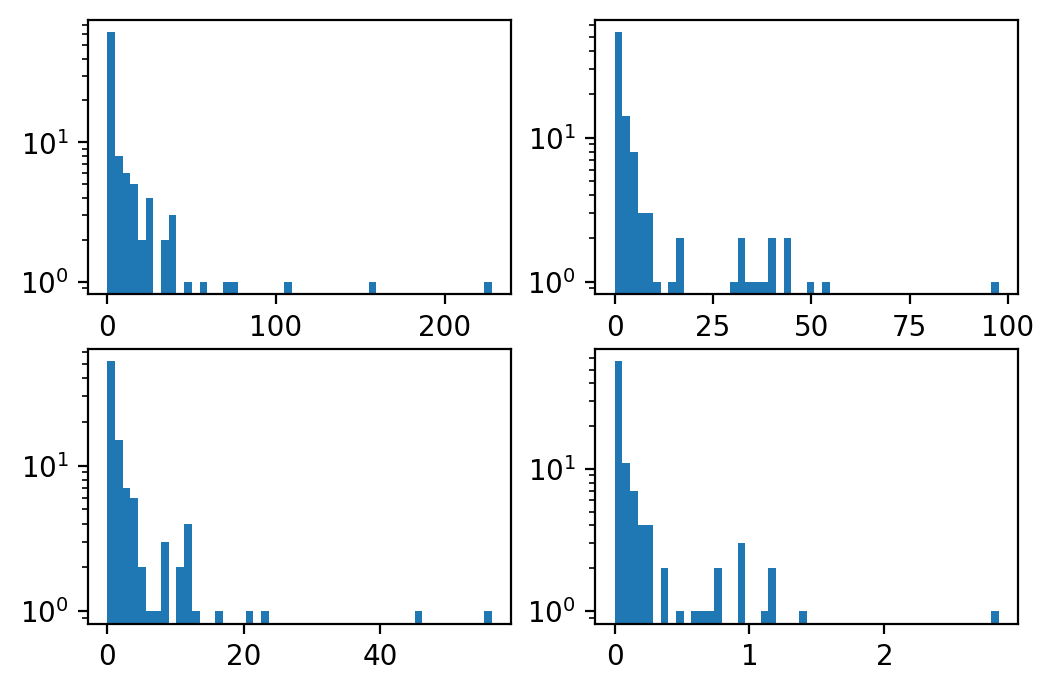

In [15]:
plt.subplot(2, 2, 1)
plt.hist(errors[:, 0], 50)
plt.yscale('log')
plt.subplot(2, 2, 2)
plt.hist(errors[:, 1], 50)
plt.yscale('log')
plt.subplot(2, 2, 3)
plt.hist(errors[:, 2], 50)
plt.yscale('log')
plt.subplot(2, 2, 4)
plt.hist(errors[:, 3], 50)
plt.yscale('log');

# Rabbit Localization

### Run architecture with rabbit dataset and see what happens 


In [24]:
import imageio
import imgaug as ia
from imgaug.augmenters import Affine
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import matplotlib.pyplot as plt
import numpy as np
from dataset_utils import show_img_bb
%matplotlib inline

from data_loader import data_loaders
data_loader = iter(data_loaders.imgTestLoader(batch_size = 512))

In [25]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.axisbelow'] = False

In [26]:
ref_img,trans_img,labels =next(data_loader)

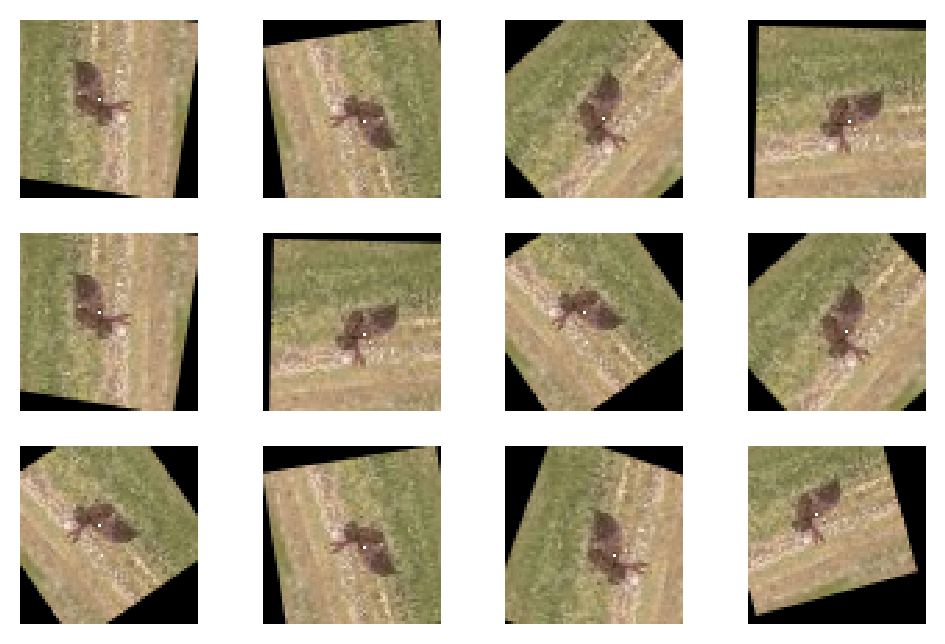

In [27]:
#for i,b in enumerate(trans_img):
b = trans_img.permute(0,2,3,1).numpy()
show_img_bb(b[:12],labels.numpy()[:12])

In [28]:
## Need path to state dictionary
state_path = 'rabbit_test/model_best.pth'
rnet = arch.LocalizationModel()
rnet.load_state_dict(torch.load(state_path)['state_dict'])
rnet = rnet.eval()

In [32]:
#Reference transform is [0,0,0,0]
offset_pred = - rnet(ref_img[0].unsqueeze(0)).float().detach().numpy()
print('offset')
labels_pred = rnet(trans_img).float().detach().numpy() + offset_pred
offset_pred = 0
#show_img_bb(b,labels.numpy(), targets_pred = labels_pred.numpy())
errors = ((labels.numpy() - (labels_pred + offset_pred))**2)
errors.mean(axis=0)

offset


array([0.22868383, 0.22669725, 0.00479354, 0.77369833], dtype=float32)

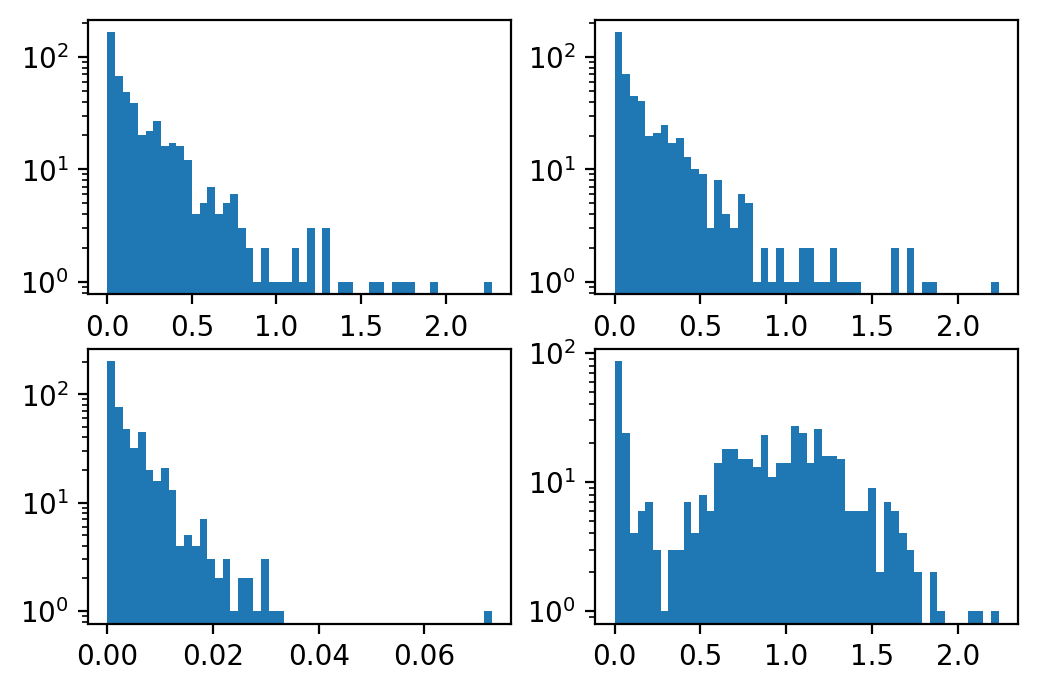

In [33]:
plt.subplot(2, 2, 1)
plt.hist(errors[:, 0], 50)
plt.yscale('log')
plt.subplot(2, 2, 2)
plt.hist(errors[:, 1], 50)
plt.yscale('log')
plt.subplot(2, 2, 3)
plt.hist(errors[:, 2], 50)
plt.yscale('log')
plt.subplot(2, 2, 4)
plt.hist(errors[:, 3], 50)
plt.yscale('log');

In [31]:
offset_pred 

array([[-0.42198715, -0.4224665 ,  0.37852708,  0.68515533]],
      dtype=float32)

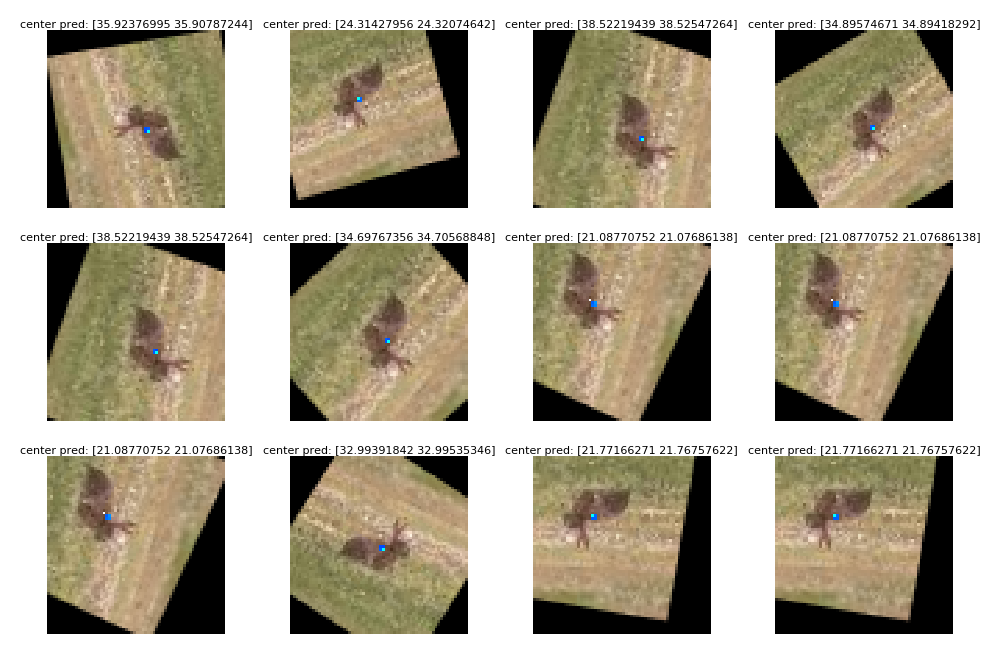

In [35]:
show_img_bb(b[:12],labels.numpy()[:12],labels_pred[:12])